# Regresión lineal Múltiple

Tenemos un dataset que posee distintos datos compilados de distintos corredores. Con variables como la "edad", "genero", "tiempo" y de donde proviene "home". Utilizando esos datos compilados, podremos poder llegar a predecir la velocidad de cada corredores si este es veloz, regular o lento todo esto utilizando el metodo de regresion lineal multiple.

Para comenzar, importaremos todas las librerias la cual utilizaremos para llevar a cabo la prediccion

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Luego con la funcion de pandas importaremos el archivo con las categorias de los corredores, y para observar su contenido ejecutaremos la funcion head(), la cual nos mostrara por pantalla los primeros datos de nuestro dataset

In [266]:
df = pd.read_csv("categorías de corredores.csv", index_col=0)
df.head()

,place,gender,age,home,time,Velocidad
3475,3592,Male,52,GBR,217.483333,Regular
13594,13853,Female,40,NY,272.550000,Regular
12012,12256,Male,31,FRA,265.283333,Regular
10236,10457,Female,33,MI,256.150000,Regular
9476,9686,Male,33,NY,252.250000,Regular


Una vez mostrado, se decide organizar el dataframe segun la columna place y ademas reorganizar el index

In [267]:
df= df.sort_values("place")
#Deseo resetear los valores del index para que no queden mal
df= df.reset_index(drop=True)

Se muestra el dataframe con las implementaciones

In [268]:
df

,place,gender,age,home,time,Velocidad
0,54,Male,37,AK,147.333333,Veloz
1,104,Male,27,NJ,156.000000,Veloz
2,116,Male,43,CO,157.583333,Veloz
3,200,Male,40,GER,163.933333,Veloz
4,213,Male,35,VA,164.500000,Veloz
...,...,...,...,...,...,...
995,23627,Male,45,GBR,478.016667,Lento
996,23641,Male,40,IRL,491.566667,Lento
997,23645,Female,46,NY,501.550000,Lento
998,23654,Male,69,NY,508.083333,Lento


Se crea una funcion la cual muestra algunos datos del dataframe

In [269]:
def stats(dataSet):
    return(f"""
Maximo de tiempo: {dataSet["time"].max()}"
Minimo de tiempo  {dataSet["time"].min()}\n
Promedio de tiempo: {dataSet["time"].mean()}
Maximo de edad: {dataSet["age"].max()}
Minimo de edad: {dataSet["age"].min()}
Promedio de edades: {dataSet["age"].mean()}
""")

In [270]:
stats(df)

'\nMaximo de tiempo: 566.7833333"\nMinimo de tiempo  147.3333333\n\nPromedio de tiempo: 268.57070000050004\nMaximo de edad: 81\nMinimo de edad: 5\nPromedio de edades: 39.1\n'

Tomando en cuenta que no se necesita la columna "place" para realizar el metodo , se decide tomar la desicion de eliminar dicha columna 

In [271]:
del(df['place'])

Se muestra el dataset luego de la eliminacion de la columna

In [272]:
df

,gender,age,home,time,Velocidad
0,Male,37,AK,147.333333,Veloz
1,Male,27,NJ,156.000000,Veloz
2,Male,43,CO,157.583333,Veloz
3,Male,40,GER,163.933333,Veloz
4,Male,35,VA,164.500000,Veloz
...,...,...,...,...,...
995,Male,45,GBR,478.016667,Lento
996,Male,40,IRL,491.566667,Lento
997,Female,46,NY,501.550000,Lento
998,Male,69,NY,508.083333,Lento


Luego se trata de analizar el dataset en busca de datos "nan", estos de alguna manera se tienen que llenar de alguna manera, ya que puede entorpecer al algoritmo.

In [273]:
nulls = pd.isnull(df)
nulls = nulls.sum()
nulls = nulls[nulls > 0]

nulls

home    1
dtype: int64

Como se puede observar en la columna "home" tenemos un nan el cual tendremos que reemplazar, para esto se utiliza la funcion fillna, la cual pasamos por parametro el metodo a utilizar 

In [274]:
df=df.fillna(method='ffill')

Ahora se procede a comprobar nuevamente si hay valores nulos en nuestro dataset. Para eso aplicaremos la funcion isnull().

In [275]:
df.isnull().any()

gender       False
age          False
home         False
time         False
Velocidad    False
dtype: bool

Luego se procede a selecionar cual va a ser nuestra variable dependiente en este caso, queremos predecir la columna "Velocidad", por ende esa sera la que selecionemos. Las demas columna de datos , seran tomadas como variables independientes. Para eos se crean funciones 

In [276]:
def independentVar():
    return df.iloc[:,0:4].values

In [277]:
def dependentVar():
    return df.iloc[:,-1].values

A continuacion se utilizan las funciones en las variables x e y. Para que finalmente, se muestre por pantalla el contenido de ambas variables

In [278]:
x = independentVar()
y = dependentVar()

In [279]:
x

array([['Male', 37, 'AK', 147.3333333],
       ['Male', 27, 'NJ', 156.0],
       ['Male', 43, 'CO', 157.5833333],
       ...,
       ['Female', 46, 'NY', 501.55],
       ['Male', 69, 'NY', 508.0833333],
       ['Female', 69, 'NY', 566.7833333]], dtype=object)

In [280]:
y


array(['Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz',
       'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Veloz', 'Regular', 'Regular',
       'Regular', 'Regular', 'Regular', 'Regular', 'Regular', 'Regular',
       'Regular', 'Regular', 'Regular', 'Regular', 'Regular', 'Regular',
       'Regular', 'Regular', 'Regular', 'Regular', 'Regular', 'Regular',
       'Regular', 'Regular', 'Regular', 'Regular', 'Regular', 'Regular',
    

Text(0.5, 0, 'Calificacion segun el parametro velocidad')

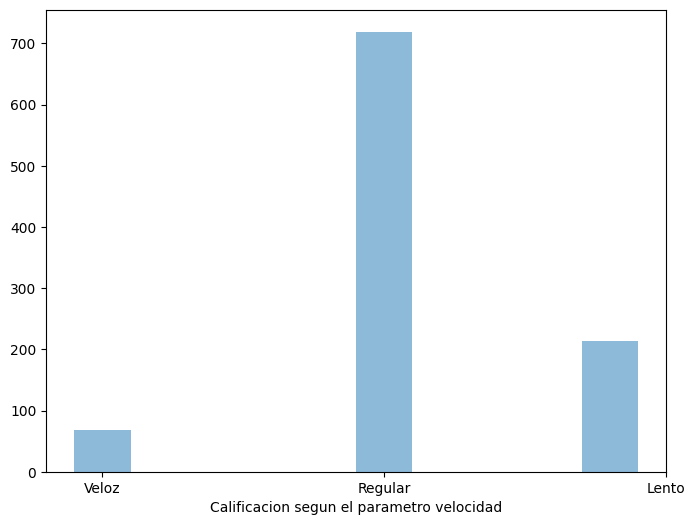

In [281]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.hist(df.Velocidad,align='left',alpha=0.5)
ax1.set_xlabel('Calificacion segun el parametro velocidad')

Como podemos observar en estre grafico una amplia mayoria de las personas en nuestro dataSet pertenecen a la categoria Regular. Luego, los demas, a la categoria Lento y finalmente la menor cantidad es las personas que son categotizadas como Veloces. 

Para poder incluir todos estos datos no numericos y que nuestro algoritmo lo utilize para mejorar su efectividad. Se utiliza la funcion creada transform, la cual le paso por parametro el el array de la variables independientes y a estas las transforma. Estas variables, se conocen como variables "dummy". LLamaeremos a la funcion pasandole por parametro la variable x y luego lo mostramos por pantalla, para notar el cambio.

In [282]:
from sklearn.preprocessing import LabelEncoder

def transform(array_dataSet):
    labelencoder_x = LabelEncoder()
    
    for i in range(array_dataSet.shape[1]-1):    
        array_dataSet[:,i] = labelencoder_x.fit_transform(array_dataSet[:,i])

In [283]:
transform(x)


In [284]:
x

array([[1, 19, 0, 147.3333333],
       [1, 9, 47, 156.0],
       [1, 25, 12, 157.5833333],
       ...,
       [0, 28, 50, 501.55],
       [1, 50, 50, 508.0833333],
       [0, 50, 50, 566.7833333]], dtype=object)

Lo mismo lo haremos con nuestra variable dependiente la cual realizaremos el mismo procedimiento.

In [285]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

A continuación, dividimos el 80% de los datos para el conjunto de entrenamiento y  el 20% de los datos al conjunto de pruebas usando el código de abajo. Cabe mencionar con la efectividad de nuestro algorimo puede ser alterada segun el porcentaje que decidamos darle para cada uno. 

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [287]:
x_train

array([[0, 15, 45, 284.4],
       [0, 12, 24, 262.35],
       [1, 8, 23, 243.4666667],
       ...,
       [1, 35, 45, 277.6833333],
       [0, 25, 9, 272.4],
       [0, 15, 67, 287.4666667]], dtype=object)

In [288]:
x_test

array([[0, 40, 50, 467.1833333],
       [1, 11, 50, 316.8166667],
       [1, 15, 52, 239.0666667],
       [0, 19, 28, 267.6333333],
       [1, 6, 50, 284.3166667],
       [1, 19, 47, 398.2666667],
       [1, 26, 20, 180.7833333],
       [1, 23, 10, 230.35],
       [1, 22, 50, 239.1333333],
       [1, 32, 9, 291.0],
       [1, 23, 9, 262.3666667],
       [1, 38, 8, 273.0666667],
       [1, 22, 67, 298.3333333],
       [0, 9, 50, 233.45],
       [0, 42, 50, 274.65],
       [1, 31, 45, 193.05],
       [1, 19, 23, 332.8166667],
       [1, 2, 20, 224.0166667],
       [1, 15, 50, 175.3666667],
       [1, 28, 20, 201.75],
       [1, 23, 41, 182.7],
       [1, 36, 45, 258.7166667],
       [0, 15, 20, 242.5166667],
       [1, 35, 47, 240.9],
       [1, 28, 20, 325.6],
       [1, 32, 56, 301.0],
       [1, 19, 20, 189.6833333],
       [1, 15, 47, 208.75],
       [1, 15, 21, 296.45],
       [1, 9, 47, 156.0],
       [0, 33, 47, 312.2166667],
       [1, 32, 47, 293.05],
       [0, 13, 50, 277.0833

In [289]:
y_test

array([0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1])

In [290]:
y_train

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

Luego se realiza la fase de "entrenamiento" de nuestro modelo con el metodo de regresion lineal, pasandole por parametro nuestras variables de entrenamiento

In [291]:
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression()

Realizaremos nuestra prediccion para poder comparar resultados, recibe por parametro la varibles independientes de entrenamiento

In [292]:
y_pred = regressor.predict(x_test)

Ahora mostraremos por pantalla los valores obtenidos para poder analizarlos

In [293]:
df_aux = pd.DataFrame({'Actual': y_test.flatten(), 'Predicción': y_pred.flatten()})
print(round(df_aux.head(30)))

    Actual  Predicción
0        0        -1.0
1        0         0.0
2        1         1.0
3        1         1.0
4        1         1.0
5        0        -0.0
6        2         2.0
7        1         1.0
8        1         1.0
9        1         1.0
10       1         1.0
11       1         1.0
12       1         1.0
13       1         1.0
14       1         1.0
15       2         1.0
16       0         0.0
17       1         1.0
18       2         2.0
19       1         1.0
20       2         2.0
21       1         1.0
22       1         1.0
23       1         1.0
24       0         0.0
25       0         1.0
26       2         1.0
27       1         1.0
28       1         1.0
29       2         2.0


Comprobaremos que segun los datos obtenidos nuestra prediccion se cumple la mayoria de las veces. Tambien se implemento un metodo de redondeo para asi poder llega a observar con mayor comodidad los resultados

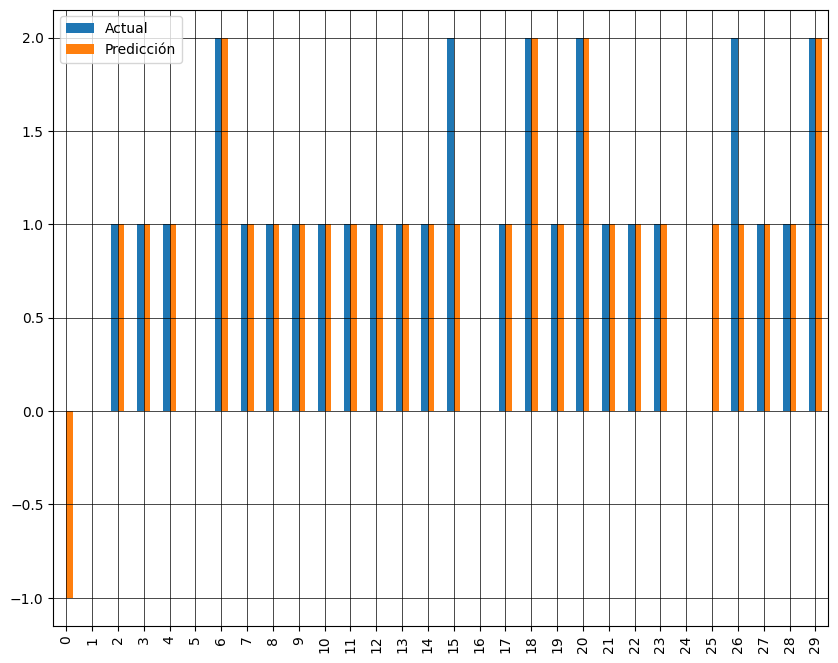

In [294]:
df_aux.round().head(30).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

De manera informativa y para saber datos de nuestro modelo y su rendimiento para comprobar su prediccion se ejecuta el siguiente codigos utilizando la libreria metrics

In [295]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 0.24330788568142064
Error Cuadratico Medio: 0.09542816062237039
Raíz del error cuadrático medio: 0.30891448755662204


# CONCLUSION

Una vez analizado ambos metodos de regresion, se llego a la conclusion que si bien el modelo investigado utiliza distintos metodos para filtrar datos que mejoraran su efectividad y claramente hay una mejoria con respecto al metodo estudiado en clase. El metodo de regresion lineal multiple logro predecir valores max, a diferencia del otro que los desprecia. Lo cual en este caso se tomo como opcion, el metodo de regresion lineal como el mas apropiado, quizas con mayor tiempo e investigacion se logre solucionar el problema planteado, en ese caso, seria mucho mas adecuado el metodo investigado 